In [4]:
''' First Lecture:
- Motivation: Linear Regression
- Perceptron
- Multilayer Perceptron

http://playground.tensorflow.org
'''


from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

# Load the digits dataset
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Reshape everything
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=784))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 180us/step - loss: 1.9570 - acc: 0.4632 - val_loss: 1.4174 - val_acc: 0.4832
Epoch 2/5
48000/48000 [==============================] - 8s 171us/step - loss: 1.4784 - acc: 0.5261 - val_loss: 1.5350 - val_acc: 0.5331
Epoch 3/5
48000/48000 [==============================] - 8s 163us/step - loss: 1.4849 - acc: 0.5275 - val_loss: 1.4125 - val_acc: 0.5286
Epoch 4/5
48000/48000 [==============================] - 9s 183us/step - loss: 1.4985 - acc: 0.5283 - val_loss: 1.4508 - val_acc: 0.5266
Epoch 5/5
48000/48000 [==============================] - 7s 156us/step - loss: 1.5126 - acc: 0.5325 - val_loss: 1.6060 - val_acc: 0.5484


In [9]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 29us/step


[1.672172809791565, 0.5399]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


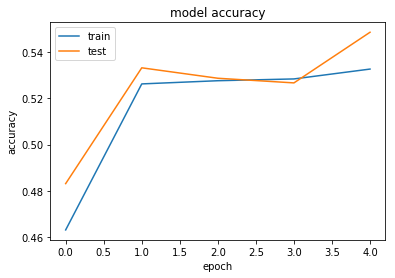

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

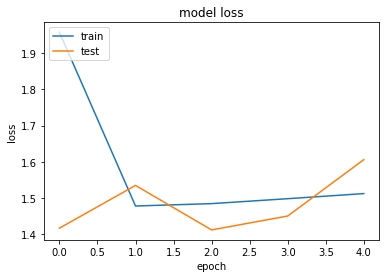

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.save_weights('model.h5')